<a href="https://colab.research.google.com/github/SebasZaRe/TransverseLinks/blob/main/The_existence_of_a_universal_transverse_knot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1
> Stabilize $L$ to get enough strands and the right permutation form.

In [ ]:
from numpy import *
import matplotlib.pyplot as plt
class Trenzas:

  def __init__(self,cruces,numhilos):
      self.cruces = list(cruces) # Vector que representa la trenza
      self.n = int(numhilos) # Número de hilos que tiene la trenza

  def reduce(self):
    Lista = self.cruces.copy()
    continueWhile = True
    while continueWhile == True:
      continueWhile = False
      for i in range(len(Lista)):
        if -Lista[i] in Lista[i:]:
          if len(Lista[i:Lista.index(-Lista[i])]) == 1:
            Lista = delete(Lista,[i,i+1]).tolist()
            continueWhile = True
            break
          elif all([j not in [Lista[i]+1,Lista[i]-1,-Lista[i]+1,-Lista[i]-1] for j in Lista[i+1:int(Lista[i:].index(-Lista[i])+i)]]):
            Lista = delete(Lista,(i,int(Lista[i:].index(-Lista[i])+i))).tolist()
            continueWhile = True
            break
    return Trenzas(Lista,self.n)

  def permutacion(self):
    perm = list(range(1,self.n+1))
    for cruce in reversed(self.cruces):
      cruce = abs(cruce)
      aux = perm[cruce-1]
      perm[cruce-1] = perm[cruce]
      perm[cruce] = aux
    return perm

  def ciclos(self):
    remain = set(self.permutacion())
    result = []
    while len(remain) > 0:
      n = remain.pop()
      cycle = [n]
      while True:
        n = self.permutacion()[n-1]
        if n not in remain:
          break
        remain.remove(n)
        cycle.append(n)
      result.append(cycle)
    return result

  def Ordenar(self):
    CrucesAux = self.cruces.copy()
    CiclosAux = self.ciclos().copy()
    Ciclos3 = [item for lista in CiclosAux for item in lista]
    if (Ciclos3 == sorted(Ciclos3)):
      return Trenzas(CrucesAux,self.n)
    else:
      for i in range(len(Ciclos3)):
        if (i+1) != Ciclos3[i]:
          CrucesAux = [j for j in range(i+1,Ciclos3[i])] + CrucesAux + [-j for j in reversed(range(i+1,Ciclos3[i]))]
          CiclosAux = Trenzas(CrucesAux,self.n).ciclos()
          Ciclos3 = [item for lista in CiclosAux for item in lista]
      return Trenzas(CrucesAux,self.n)

  def Condicion1(self):
    # Condicion1 te devuelve el número de hilos totales que se necesitan para estabilizar la trenza
    # n1 := Número de hilos que tiene el primer ciclo de la trenza
    # n := Número de ciclos totales
    numhilosCiclo1 = len(self.ciclos()[0])
    Newnumhilos = 2*numhilosCiclo1
    numhilosRestantes = self.n - numhilosCiclo1
    #--Condición
    if numhilosRestantes <= numhilosCiclo1 :
      numhilosRestantes = numhilosCiclo1
    else:
      numhilosCiclo1 = numhilosRestantes
    while numhilosCiclo1 < 8 or Newnumhilos < self.n or numhilosCiclo1 != numhilosRestantes:
      numhilosCiclo1 = numhilosCiclo1 + 1
      Newnumhilos = 2*numhilosCiclo1
      numhilosRestantes = Newnumhilos - numhilosCiclo1
    return Newnumhilos

  def Estabilizar(self):
    Newn = self.Condicion1()
    if Newn == self.n:
      Newcruces = self.Ordenar().cruces.copy()
    else:
      Newcruces = self.Ordenar().cruces.copy()
      Au_cruces = int(Newn / 2 - len(self.ciclos()[0])) #Número de cruces que se deben de aumentar al primer ciclo
      Newcruces = [item + Au_cruces if item > 0 else item - Au_cruces for item in Newcruces]
      Newcruces = Newcruces + [i + 1 for i in reversed(range(int(Au_cruces)))] # Estabilizar el primer ciclo
      Newcruces = [i for i in reversed(range(int(Au_cruces + self.n),int(Newn)))] + Newcruces #Estabilizar ultimo ciclo
    return Trenzas(Newcruces, Newn)

  def GenerarCi(self):
    Ci = []
    for i in (range(len(self.Estabilizar().ciclos()))):
      if len(self.Estabilizar().ciclos()[i]) != 1:
        Ci.append([j for j in reversed(self.Estabilizar().ciclos()[i][:-1])])
    return Ci

  def GenerarTrenzaPura(self):
    #print(self.Estabilizar().ciclos())
    CruceAux = self.Estabilizar().cruces.copy()
    Ci = self.GenerarCi()
    #CruceC = []
    #for i in (range(len(self.Estabilizar().ciclos()))):
    #  CruceC.append([j for j in reversed(self.Estabilizar().ciclos()[i][:-1])])
    #for i in range(len(self.Estabilizar().ciclos())):
    CruceAux = [-j for j in reversed(Ci[-1])] + CruceAux
    for i in range(len(Ci) - 1):
      if i == 0:
        CruceAux = CruceAux + [-j for j in reversed(Ci[i])]
      else:
        CruceAux = [-j for j in reversed(Ci[i])] + CruceAux
    return Trenzas(CruceAux, self.Estabilizar().n)

  def Comb(self,Cruces): #---Falta reducir---
    V = list(range(1,self.n+1)).copy()
    perm = []
    for i in range(len(Cruces)):
      aux = V[abs(Cruces[i])]
      V[abs(Cruces[i])] = V[abs(Cruces[i])-1]
      V[abs(Cruces[i])-1] = aux
      perm.append(V.copy())
    return perm

  def reduce3(self):
    CrucesTrenzaPura = self.cruces.copy()
    CrucesTrenzaPuraAux = CrucesTrenzaPura.copy() #Se hace una copia la cual se modificará
    Permutaciones = self.Comb(CrucesTrenzaPuraAux)
    #print(len(Permutaciones))
    continueWhile = True
    while continueWhile == True:
      continueWhile = False
      for i in range(len(Permutaciones)):
        if any([Permutaciones[i][abs(CrucesTrenzaPuraAux[i])] == Permutaciones[j][abs(CrucesTrenzaPuraAux[j])-1] and Permutaciones[i][abs(CrucesTrenzaPuraAux[i])-1] == Permutaciones[j][abs(CrucesTrenzaPuraAux[j])] for j in range(i+1,len(CrucesTrenzaPuraAux))]):
          #Condiciones para deshacer los cruces
          PosicionCruce = [Permutaciones[i][abs(CrucesTrenzaPuraAux[i])] == Permutaciones[j][abs(CrucesTrenzaPuraAux[j])-1] and Permutaciones[i][abs(CrucesTrenzaPuraAux[i])-1] == Permutaciones[j][abs(CrucesTrenzaPuraAux[j])] for j in range(i+1,len(CrucesTrenzaPuraAux))].index(True) + i + 1
          #Primera concidicón que compara si los dos cruces tienen el mismo signo
          #print(i,PosicionCruce)
          if CrucesTrenzaPuraAux[i]/abs(CrucesTrenzaPuraAux[i]) == -CrucesTrenzaPuraAux[PosicionCruce]/abs(CrucesTrenzaPuraAux[PosicionCruce]):
            Hilo1 = Permutaciones[i][abs(CrucesTrenzaPuraAux[i])-1]
            Hilo2 = Permutaciones[i][abs(CrucesTrenzaPuraAux[i])]
            #print(Hilo1,Hilo2)
            #---Reducir---
            #Informacion1 e Informacion2 es un vector de pares el cual indica si el cruce es positico o negativo y con que hilo fue el cruce
            InformacionHilo1 = []
            InformacionHilo2 = []
            #print('si entra a la segunda condición')
            for j in range(i+1,PosicionCruce):
              if Permutaciones[j-1].index(Hilo1) != Permutaciones[j].index(Hilo1):
                InformacionHilo1.append([Permutaciones[j][abs(Permutaciones[j-1].index(Hilo1))],int(CrucesTrenzaPuraAux[j]/abs(CrucesTrenzaPuraAux[j]))])
              if Permutaciones[j-1].index(Hilo2) != Permutaciones[j].index(Hilo2):
                InformacionHilo2.append([Permutaciones[j][abs(Permutaciones[j-1].index(Hilo2))],int(CrucesTrenzaPuraAux[j]/abs(CrucesTrenzaPuraAux[j]))])
            #print(InformacionHilo1)
            #print(InformacionHilo2)
            if InformacionHilo1 == InformacionHilo2:
              continueWhile = True
              CrucesTrenzaPuraAux = delete(CrucesTrenzaPuraAux,(i,PosicionCruce)).tolist().copy()
              Permutaciones = self.Comb(CrucesTrenzaPuraAux.copy())
              break
      #print(CrucesTrenzaPuraAux)
    return Trenzas(CrucesTrenzaPuraAux,self.n)

#Realicemos graficas de las trenzas
  def Diagrama(self):
    ymax=len(self.cruces);
    for k in range(0,ymax):
      for j in range(0,4):
        for i in range(1,self.n+1):
          if self.cruces[k]==i:
            plt.plot([i,i+1/3],[ymax-k,ymax-k-1/3],"k-");
            plt.plot([i+2/3,i+1],[ymax-k-2/3,ymax-k-1],"k-");
            plt.plot([i,i+1],[ymax-k-1,ymax-k],"k-");
          elif self.cruces[k]==-i:
            plt.plot([i,i+1/3],[ymax-k-1,ymax-k-2/3],"k-");
            plt.plot([i+2/3,i+1],[ymax-k-1/3,ymax-k],"k-");
            plt.plot([i,i+1],[ymax-k,ymax-k-1],"k-");
          elif self.cruces[k]==i-1 or self.cruces[k]==-i+1:
            plt.plot();
          else:
            plt.plot([i,i],[ymax-k,ymax-k-1],"k-");
    plt.show()
    plt.axis('off');


# Parte 2
> Factorize $B_L$ as a product of cyclic braids and Artin’s generators.

In [ ]:
from numpy import *
from matplotlib.pyplot import *
class TrenzasPuras:

  def __init__(self,cruces,n):
    self.cruces = cruces # Trenza pura
    self.n = n # Número de hilos de la trenza pura

  # Convenios := Los generadores de Artín se representarán de la forma:
  # A_(i,j) = (i,j)

  def reduce(self):
    Lista = self.cruces.copy()
    continueWhile = True
    while continueWhile == True:
      continueWhile = False
      for i in range(len(Lista)):
        if -Lista[i] in Lista[i:]:
          if len(Lista[i:Lista.index(-Lista[i])]) == 1:
            Lista = delete(Lista,[i,i+1]).tolist()
            continueWhile = True
            break
          elif all([j not in [Lista[i]+1,Lista[i]-1,-Lista[i]+1,-Lista[i]-1] for j in Lista[i+1:int(Lista[i:].index(-Lista[i])+i)]]):
            Lista = delete(Lista,(i,int(Lista[i:].index(-Lista[i])+i))).tolist()
            continueWhile = True
            break
    return TrenzasPuras(Lista,self.n)

  def reduceArtin(self, CrucesReducido):
    continueWhile = True
    while continueWhile == True:
      continueWhile = False
      for i in range(len(CrucesReducido) - 1):
        if CrucesReducido[i][0] == CrucesReducido[i + 1][1] and CrucesReducido[i][1] == CrucesReducido[i + 1][0]:
          CrucesReducido = CrucesReducido[0:i] + CrucesReducido[i + 2:]
          continueWhile = True
          break
    return CrucesReducido


  def Comb2(self,Cruces): #---Falta reducir---
    V = list(range(1,self.n+1)).copy()
    perm = []
    perm.append(V.copy())
    for i in range(len(Cruces)):
      aux = V[abs(Cruces[i])]
      V[abs(Cruces[i])] = V[abs(Cruces[i])-1]
      V[abs(Cruces[i])-1] = aux
      perm.append(V.copy())
    return perm

  def GeneradoresArtin(self,Vec_Cruces,Hiloj):
    Combinaciones = self.Comb2(Vec_Cruces)
    PosHiloj = [Combinaciones[i].index(Hiloj) + 1 for i in range(len(Vec_Cruces))]
    TrenzaPuraGen = []
    for i in range(len(Vec_Cruces)):
      if Vec_Cruces[i] > 0:
        if PosHiloj[i] < Vec_Cruces[i]:
          TrenzaPuraGen = TrenzaPuraGen + [Vec_Cruces[i] - 1]
        elif PosHiloj[i] == Vec_Cruces[i]:
          TrenzaPuraGen = TrenzaPuraGen + [(Vec_Cruces[i],Hiloj)]
        elif PosHiloj[i] == Vec_Cruces[i] + 1:
          TrenzaPuraGen = TrenzaPuraGen + []
        elif PosHiloj[i] > Vec_Cruces[i] + 1:
          TrenzaPuraGen = TrenzaPuraGen + [Vec_Cruces[i]]
      else:
        if PosHiloj[i] < abs(Vec_Cruces[i]):
          TrenzaPuraGen = TrenzaPuraGen + [Vec_Cruces[i] + 1]
        elif PosHiloj[i] == abs(Vec_Cruces[i]):
          TrenzaPuraGen = TrenzaPuraGen + []
        elif PosHiloj[i] == abs(Vec_Cruces[i]) + 1:
          TrenzaPuraGen = TrenzaPuraGen + [(Hiloj,abs(Vec_Cruces[i]))]
        elif PosHiloj[i] > abs(Vec_Cruces[i]) + 1:
          TrenzaPuraGen = TrenzaPuraGen + [Vec_Cruces[i]]
    return TrenzaPuraGen

  def PeindadoCrucesGeneradores(self,CrucesArtin):
    continueWhile = True
    while continueWhile == True:
      continueWhile = False
      for i in range(len(CrucesArtin)-1):
        if type(CrucesArtin[i]) == tuple and type(CrucesArtin[i + 1]) == int:
          if CrucesArtin[i][0] < CrucesArtin[i][1]: # Comprobar si el generador de Artin es postivo
            if CrucesArtin[i][0] < abs(CrucesArtin[i + 1]): # Caso a)
              CrucesArtin = CrucesArtin[0:i] + [CrucesArtin[i + 1], (CrucesArtin[i][0],CrucesArtin[i][1])] + CrucesArtin[i + 2:]
            elif CrucesArtin[i][0] == abs(CrucesArtin[i + 1]): # Caso b
              if CrucesArtin[i + 1] < 0: # Caso b_1)
                CrucesArtin = CrucesArtin[0:i] + [CrucesArtin[i + 1], (CrucesArtin[i][0] + 1,CrucesArtin[i][1])] + CrucesArtin[i + 2:]
              else: # Caso b_2)
                CrucesArtin = CrucesArtin[0:i] + [CrucesArtin[i + 1], (CrucesArtin[i][0],CrucesArtin[i][1]), (CrucesArtin[i][0] + 1,CrucesArtin[i][1]), (CrucesArtin[i][1],CrucesArtin[i][0])] + CrucesArtin[i + 2:]
            elif CrucesArtin[i][0] == abs(CrucesArtin[i + 1]) + 1: # Caso c
              if CrucesArtin[i + 1] < 0:
                CrucesArtin = CrucesArtin[0:i] + [CrucesArtin[i + 1], (CrucesArtin[i][1],CrucesArtin[i][0]), (CrucesArtin[i][0] - 1,CrucesArtin[i][1]), (CrucesArtin[i][0],CrucesArtin[i][1])] + CrucesArtin[i + 2:]
              else:
                CrucesArtin = CrucesArtin[0:i] + [CrucesArtin[i + 1], (CrucesArtin[i][0] - 1,CrucesArtin[i][1])] + CrucesArtin[i + 2:]
            elif CrucesArtin[i][0] > abs(CrucesArtin[i + 1]) + 1: # Caso d
              if CrucesArtin[i + 1] < 0:
                CrucesArtin = CrucesArtin[0:i] + [CrucesArtin[i + 1], (CrucesArtin[i][0],CrucesArtin[i][1])] + CrucesArtin[i + 2:]
              else:
                CrucesArtin = CrucesArtin[0:i] + [CrucesArtin[i + 1], (CrucesArtin[i][0],CrucesArtin[i][1])] + CrucesArtin[i + 2:]
          else: #Caso 2. Generador de Artín negativo
            if CrucesArtin[i][1] < abs(CrucesArtin[i + 1]): # Caso a)
              CrucesArtin = CrucesArtin[0:i] + [CrucesArtin[i + 1], (CrucesArtin[i][0],CrucesArtin[i][1])] + CrucesArtin[i + 2:]
            elif CrucesArtin[i][1] == abs(CrucesArtin[i + 1]): # Caso b
              if CrucesArtin[i + 1] < 0: # Caso b_1)
                CrucesArtin = CrucesArtin[0:i] + [CrucesArtin[i + 1], (CrucesArtin[i][0],CrucesArtin[i][1] + 1)] + CrucesArtin[i + 2:]
              else: # Caso b_2)
                CrucesArtin = CrucesArtin[0:i] + [CrucesArtin[i + 1], (CrucesArtin[i][0],CrucesArtin[i][1]), (CrucesArtin[i][0],CrucesArtin[i][1] + 1), (CrucesArtin[i][1],CrucesArtin[i][0])] + CrucesArtin[i + 2:]
            elif CrucesArtin[i][1] == abs(CrucesArtin[i + 1]) + 1: # Caso c
              if CrucesArtin[i + 1] < 0:
                CrucesArtin = CrucesArtin[0:i] + [CrucesArtin[i + 1], (CrucesArtin[i][1],CrucesArtin[i][0]), (CrucesArtin[i][0],CrucesArtin[i][1] - 1), (CrucesArtin[i][0],CrucesArtin[i][1])] + CrucesArtin[i + 2:]
              else:
                CrucesArtin = CrucesArtin[0:i] + [CrucesArtin[i + 1], (CrucesArtin[i][0],CrucesArtin[i][1] - 1)] + CrucesArtin[i + 2:]
            elif CrucesArtin[i][1] > abs(CrucesArtin[i + 1]) + 1: # Caso d
              if CrucesArtin[i + 1] < 0:
                CrucesArtin = CrucesArtin[0:i] + [CrucesArtin[i + 1], (CrucesArtin[i][0],CrucesArtin[i][1])] + CrucesArtin[i + 2:]
              else:
                CrucesArtin = CrucesArtin[0:i] + [CrucesArtin[i + 1], (CrucesArtin[i][0],CrucesArtin[i][1])] + CrucesArtin[i + 2:]
          continueWhile = True
          #print(V)
          break
    return CrucesArtin

  def PeinadoGeneral(self):
    CrucesAux = self.cruces.copy()
    CrucesArtinAux = self.GeneradoresArtin(self.cruces,self.n).copy()
    #print(CrucesAux)
    CrucesPeinadoAux = self.PeindadoCrucesGeneradores(CrucesAux).copy()
    #print(CrucesPeinadoAux)
    for i in reversed(range(1, self.n)):
      #print(i)
      CrucesAux = [j for j in CrucesPeinadoAux.copy() if type(j) == int].copy()
      CrucesArtinAux = self.GeneradoresArtin(CrucesAux, i).copy()
      #print(CrucesAux)
      CrucesPeinadoAux = ( self.PeindadoCrucesGeneradores(CrucesArtinAux).copy() + [j for j in CrucesPeinadoAux.copy() if type(j) == tuple]).copy()
    CrucesPeinadoAux = self.reduceArtin(CrucesPeinadoAux)
    return CrucesPeinadoAux

  def GenArtin_GenBasico(self):
    TrenzaBasica = []
    for i in range(len(self.PeinadoGeneral())):
      if self.PeinadoGeneral()[i][0] < self.PeinadoGeneral()[i][1]:
        TrenzaBasica = TrenzaBasica + [j for j in range(self.PeinadoGeneral()[i][0] + 1, self.PeinadoGeneral()[i][1])] + [self.PeinadoGeneral()[i][0], self.PeinadoGeneral()[i][0]] + [-j for j in reversed(range(self.PeinadoGeneral()[i][0] + 1, self.PeinadoGeneral()[i][1]))]
      else:
        TrenzaBasica = TrenzaBasica + [j for j in range(self.PeinadoGeneral()[i][1] + 1, self.PeinadoGeneral()[i][0])] + [-self.PeinadoGeneral()[i][1], -self.PeinadoGeneral()[i][1]] + [-j for j in reversed(range(self.PeinadoGeneral()[i][1] + 1, self.PeinadoGeneral()[i][0]))]
    return TrenzaBasica

  def Campana(self,CruceArtin,y):
    x = -((max(CruceArtin) - min(CruceArtin) + 1.5)/(y**2 + 1)) + max(CruceArtin)
    return x

  def GraficaArtin(self):
    #axis('off')
    CrucesArtin = self.PeinadoGeneral().copy()
    dist = 0
    anchAnt = 0
    anchAct = 0
    anchTotal = sum([2*sqrt((max(item)-min(item)+1.5)-1) for item in CrucesArtin])
    y = linspace(sqrt((max(CrucesArtin[0])-min(CrucesArtin[0])+1.5)-1), sqrt((max(CrucesArtin[0])-min(CrucesArtin[0])+1.5)-1) - anchTotal,100)
    for item in range(self.n):
      plot([item for i in range(100)],y,'b-')
    for item in range(len(CrucesArtin)):
      i = min(CrucesArtin[item])
      j = max(CrucesArtin[item])
      y = linspace(-sqrt((j-i+1.5)-1),sqrt((j-i+1.5)-1),100)
      x = self.Campana(CrucesArtin[item], y)
      plot(x,y-dist,'k-')
      if item !=len(CrucesArtin)-1:
        anchAnt = sqrt((j-i+1.5)-1)
        anchAct = sqrt((max(CrucesArtin[item+1])-min(CrucesArtin[item+1])+1.5)-1)
      dist = anchAnt + anchAct + dist
    yticks([])
    show()


#Trenza2 = TrenzasPuras([-1,2,1,-3,2,2,3,2,-1,2],4)
#Trenza2 = TrenzasPuras([7, 6, 7, -7, -6, -7],16)
#Trenza2 = TrenzasPuras([-1,1],2)
#print(Trenza2.GeneradoresArtin([-1,2,1,-3,2,2,3,2,-1,2],4))
#print(Trenza2.GeneradoresArtin([7, 6, 7, -7, -6, -7],8))
#print(Trenza2.PeindadoCrucesGeneradores([6,-6]))
#print(Trenza2.GeneradoresArtin([6,-6],7))
#print(Trenza2.PeindadoCrucesGeneradores([]))
#print(Trenza2.GeneradoresArtin([7, 6, 7, -7, -6, -7], 8))
#print(Trenza2.PeinadoGeneral())
#Trenza2.GraficaArtin()
Trenza2 = TrenzasPuras([-1,2,1,-3,2,2,3,2,-1,2],4)
A = Trenza2.GeneradoresArtin([-1,2,1,-3,2,2,3,2,-1,2],4)
B =Trenza2.PeindadoCrucesGeneradores(A)
print(A)
print(B)

[-1, 2, 1, (4, 3), (2, 4), (3, 4), 2, -1, 2]
[-1, 2, 1, 2, -1, 2, (2, 4), (3, 4), (4, 2), (4, 1), (4, 2), (4, 3), (2, 4), (4, 2), (4, 3), (2, 4), (1, 4), (2, 4), (3, 4), (4, 2), (2, 4), (2, 4), (3, 4), (4, 2), (4, 1), (4, 2), (4, 3), (2, 4), (4, 2), (4, 3), (2, 4), (1, 4), (2, 4), (3, 4), (4, 2)]


# Parte 3
> Obtaining $C_i$ as a lift of some braid.



In [ ]:
from numpy import *
import matplotlib.pyplot as plt

# Requiere los cruces Ci genreados en la parte 1

def CruceRenumerar(Ci,NumHilos): #Cambia la numeracionde los cruces de los Ci's
  Alphai = []
  for crucei in [item for l in Ci for item in l]:
    if crucei == NumHilos/2:
      Alphai.extend(list(reversed([item for item in range(1,int(NumHilos))])))
      Alphai.extend([-item for item in range(2,int(NumHilos))])
    elif crucei < NumHilos/2:
      Alphai.append( int(NumHilos/2 + crucei) )
    else:
      Alphai.append( int(-NumHilos/2 + crucei) )
  return Alphai

def AsignarGammai(CruceAlphai, NumHilos): # Le asigna varios cruces(gamma) a cada alpha_i
  m = int(NumHilos/2)
  CruceAlphaiPos = abs(CruceAlphai)
  if CruceAlphaiPos > m:
    Gammai = list(reversed(-array([item for item in range(2, CruceAlphaiPos)]))) + [-item for item in range(2,5)] + [5,5] + list(reversed(-array([-item for item in range(1, 5)]))) + [item for item in range(1, CruceAlphaiPos)]
    Gammai = Gammai + [-CruceAlphai, -CruceAlphai]
    Gammai = Gammai + list(reversed(-array([item for item in range(1, CruceAlphaiPos)]))) + [-item for item in range(1, 5)] +[-5,-5] + list(reversed(-array([-item for item in range(2,5)]))) + [item for item in range(2, CruceAlphaiPos)]
  elif CruceAlphaiPos <= m: #Checar que pasa con la mitad
    Gammai = [item for item in range(CruceAlphaiPos+1,2*m-1)] + list(reversed(-array([-item for item in range(2*m-4,2*m-1)]))) + [-(2*m-5),-(2*m-5)] + [-item for item in range(2*m-4,2*m)] + list(reversed(-array([item for item in range(CruceAlphaiPos+1,2*m)])))
    Gammai = Gammai + [-CruceAlphai,-CruceAlphai]
    Gammai = Gammai + [item for item in range(CruceAlphaiPos+1,2*m)] + list(reversed(-array([-item for item in range(2*m-4,2*m)]))) + [2*m-5,2*m-5] + [-item for item in range(2*m-4,2*m-1)] + list(reversed(-array([item for item in range(CruceAlphaiPos+1,2*m-1)])))
  return Gammai

def BajarCruces(CrucesRenumerados, NumHilos): #Pide los cruces reordenados
  CrucesBajados = [] #Cambiar ?)
  for i in range(len(CrucesRenumerados)):
    CrucesBajados.extend([CrucesRenumerados[i], CrucesRenumerados[i], CrucesRenumerados[i]])
    CrucesBajados.extend(AsignarGammai(CrucesRenumerados[i],NumHilos))
  return CrucesBajados

#print(AsignarGammai(8,16))
#print(CruceRenumerar([[7, 6, 5, 4, 3, 2, 1], [15, 14, 13, 12, 11, 10, 9]],16))
#print(BajarCruces([15, 14, 13, 12, 11, 10, 9, 7, 6, 5, 4, 3, 2, 1],16))
#[-7, -6, -5, -4, -3, -2, -2, -3, -4, 5, 5, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 7, -8, -8, -7, -6, -5, -4, -3, -2, -1, -1, -2, -3, -4, -5, -5, 4, 3, 2, 2, 3, 4, 5, 6, 7]


# Parte 4
> Obtaining $A_i,_j$ as a lift of some braid

In [ ]:
from numpy import *
import matplotlib.pyplot as plt

# Requiere los generadores de Artín (i,j) dados en la patte 2

def GenerarCruce(GenArtin, numHilos): #Pide un generador de Artín por separado y el número de hilos, del cual se ocupará numhilos/2
  # j = max(GenArtin), i = min(GenArtin)
  m = int (numHilos / 2)
  if GenArtin[0] < GenArtin[1]:
    if all([item <= m for item in GenArtin]) or all([item > m for item in GenArtin]): #Checar si es min(A_i,j) o A[0]
      if GenArtin[0]<GenArtin[1] and GenArtin[1]<=m:
        NuevosCruces = [int(m+GenArtin[1]-k) for k in range(1,GenArtin[1] - GenArtin[0]) for item in range(3)]
        NuevosCruces = NuevosCruces + [int(GenArtin[0] + m) for i in range(6)]
        NuevosCruces = NuevosCruces + AsignarGammai(int(GenArtin[0] + m),2*m)+AsignarGammai(int(GenArtin[0] + m),2*m)+AsignarGammai(int(GenArtin[0] + m),2*m)
        #NuevosCruces = [item for j in NuevosCruces for item in j]
        NuevosCruces = NuevosCruces + list(reversed(-array([int(m+GenArtin[1]-k) for k in range(1,GenArtin[1] - GenArtin[0]) for item in range(3)])))
      else:
        NuevosCruces = [int(-m+GenArtin[1]-k) for k in range(1,GenArtin[1] - GenArtin[0]) for item in range(3)]
        NuevosCruces = NuevosCruces + [int (GenArtin[0] - m) for i in range(6)]
        NuevosCruces = NuevosCruces + AsignarGammai(int(GenArtin[0] - m),2*m) + AsignarGammai(int(GenArtin[0] - m),2*m)+AsignarGammai(int(GenArtin[0] - m),2*m)
        #NuevosCruces = [item for j in NuevosCruces for item in j]
        NuevosCruces = NuevosCruces + list(reversed(-array([int(-m+GenArtin[1]-k) for k in range(1,GenArtin[1] - GenArtin[0]) for item in range(3)])))
    else:
      if GenArtin[1] <= 2*m -1:
        DeltaiPositivo = [-item for item in range(GenArtin[1], 2*m) for j in range(3)]
      else:
        DeltaiPositivo = []
      if GenArtin[0] > 1:
        DeltajNegativo = [item for item in reversed(range(1, GenArtin[0])) for i in range(3)]
      else:
        DeltajNegativo = []
      Alpha0 = list(reversed([item for item in range(1,int(numHilos))])) + [-item for item in range(2,int(numHilos))]
      NuevosCruces = DeltaiPositivo + DeltajNegativo + Alpha0 + Alpha0 + [-item for item in reversed(DeltajNegativo)] + [-item for item in reversed(DeltaiPositivo)]
      NuevosCruces = list(reversed(-array(NuevosCruces)))
  else:
    if all([item <= m for item in GenArtin]) or all([item > m for item in GenArtin]): #Checar si es min(A_i,j) o A[0]
      if GenArtin[1]<GenArtin[0] and GenArtin[0]<=m:
        NuevosCruces = [int(m+GenArtin[0]-k) for k in range(1,GenArtin[0] - GenArtin[1]) for item in range(3)]
        NuevosCruces = NuevosCruces + AsignarGammai(int(GenArtin[1] + m),2*m)+AsignarGammai(int(GenArtin[1] + m),2*m)+AsignarGammai(int(GenArtin[1] + m),2*m)
        NuevosCruces = NuevosCruces + list(reversed(-array([int(GenArtin[1] + m) for i in range(6)])))
        NuevosCruces = NuevosCruces + list(reversed(-array([int(m+GenArtin[0]-k) for k in range(1,GenArtin[0] - GenArtin[1]) for item in range(3)])))
      else:
        NuevosCruces = [int(-m+GenArtin[0]-k) for k in range(1,GenArtin[0] - GenArtin[1]) for item in range(3)]
        NuevosCruces = NuevosCruces + AsignarGammai(int(GenArtin[1] - m),2*m)+AsignarGammai(int(GenArtin[1] - m),2*m)+AsignarGammai(int(GenArtin[1] - m),2*m)
        NuevosCruces = NuevosCruces + list(reversed(-array([int (GenArtin[1] - m) for i in range(6)])))
        NuevosCruces = NuevosCruces + list(reversed(-array([int(-m+GenArtin[0]-k) for k in range(1,GenArtin[0] - GenArtin[1]) for item in range(3)])))
    else:
      if GenArtin[1] <= 2*m -1:
        DeltaiPositivo = [-item for item in range(GenArtin[0], 2*m) for j in range(3)]
      else:
        DeltaiPositivo = []
      if GenArtin[0] > 1:
        DeltajNegativo = [item for item in reversed(range(1, GenArtin[1])) for i in range(3)]
      else:
        DeltajNegativo = []
      Alpha0 = list(reversed([item for item in range(1,int(numHilos))])) + [-item for item in range(2,int(numHilos))]
      NuevosCruces = DeltaiPositivo + DeltajNegativo + list(reversed(-array(Alpha0)))  + list(reversed(-array(Alpha0))) + [-item for item in reversed(DeltajNegativo)] + [-item for item in reversed(DeltaiPositivo)]
      NuevosCruces = list(reversed(-array(NuevosCruces)))
  return NuevosCruces

def CambiarGeneradoresArtin(crucesArtin, numHilos):
  nuevosGeneradores = []
  for i in range(len(crucesArtin)):
    nuevosGeneradores.extend(GenerarCruce(crucesArtin[i], numHilos))
  return nuevosGeneradores

print(GenerarCruce((9,10),16))
print(GenerarCruce((10,9),16))

[1, 1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 13, 12, -11, -11, -12, -13, -14, -15, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 15, 14, 13, 12, 11, 11, -12, -13, -14, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 13, 12, -11, -11, -12, -13, -14, -15, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 15, 14, 13, 12, 11, 11, -12, -13, -14, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 13, 12, -11, -11, -12, -13, -14, -15, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 15, 14, 13, 12, 11, 11, -12, -13, -14, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 13, 12, -11, -11, -12, -13, -14,

# Parte 5
> Final move to reduce the number of components

In [ ]:
from numpy import *

def IteracionFinal(Trenza):
  ite = len(Trenza.ciclos())
  trenza = Trenza
  for i in range(ite-1):
    trenza = trenza.reduce()
    trenzaConjugada = trenza.Ordenar().reduce()
    trenzaEstabilizada = trenzaConjugada.Estabilizar()
    Ci = trenzaEstabilizada.GenerarCi()
    trenzaPura = trenzaEstabilizada.GenerarTrenzaPura().reduce()
    print(trenzaPura.cruces)
    alphaCi = CruceRenumerar(Ci, trenzaPura.n) #Paso 3
    crucesBajados = BajarCruces(alphaCi, trenzaPura.n)#Paso 3
    trenzaPura = TrenzasPuras(trenzaPura.cruces,trenzaPura.n) #Paso 2
    CrucesArtin = trenzaPura.PeinadoGeneral() #Paso 2
    print(CrucesArtin)
    nuevosGeneradoresArtin = CambiarGeneradoresArtin(CrucesArtin, trenzaPura.n) #Paso 4
    trenza = Trenzas([int(trenzaPura.n/2), int(trenzaPura.n/2),int(trenzaPura.n/2)]+crucesBajados + nuevosGeneradoresArtin, trenzaPura.n).reduce()
    #print(trenza.cruces)
    #print(len(trenza.cruces))
  return trenza

trenza = Trenzas([1,1],2)
print(IteracionFinal(trenza).cruces)
print(len(IteracionFinal(trenza).cruces))
print(IteracionFinal(trenza).ciclos)

[8, 8]
[(8, 9)]
[8, 8, 8, 15, 15, 15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -2, -3, -4, 5, 5, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, -15, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, -2, -3, -4, -5, -5, 4, 3, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 14, 14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -2, -3, -4, 5, 5, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, -14, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, -2, -3, -4, -5, -5, 4, 3, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 13, 13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -2, -3, -4, 5, 5, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -13, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, -2, -3, -4, -5, -5, 4, 3, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 12, 12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -2, -3, -4, 5, 5, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -12, -12, -11, -10, -9, -8,

# Sección de Pruebas

<class '__main__.Trenzas'>
[-1, 3, 5, -4, -4]


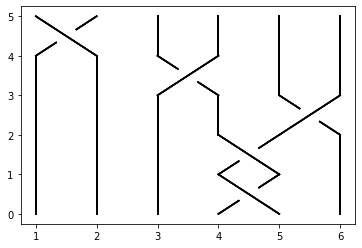

Ciclo asociado a la trenza:  [[1, 2], [3, 4], [5, 6]]
Cruces de la trenza conjugada:  [-1, 3, 5, -4, -4]


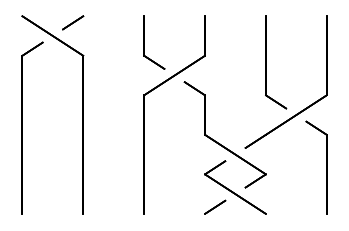

Ciclo asociado a la trenza conjugada:  [[1, 2], [3, 4], [5, 6]]
Trenza conjugada reducida:  [-1, 3, 5, -4, -4]
Trenza estabilizada:  [15, 14, 13, 12, -7, 9, 11, -10, -10, 6, 5, 4, 3, 2, 1]
Ciclo de trenza estabilizada:  [[1, 2, 3, 4, 5, 6, 7, 8], [9, 10], [11, 12, 13, 14, 15, 16]]


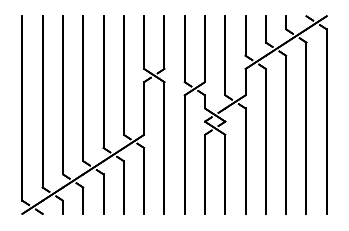

Ci´s  [[7, 6, 5, 4, 3, 2, 1], [9], [15, 14, 13, 12, 11]]
Trenza pura asociada:  [-9, -11, -12, -13, -14, -15, 15, 14, 13, 12, -7, 9, 11, -10, -10, 6, 5, 4, 3, 2, 1, -1, -2, -3, -4, -5, -6, -7]


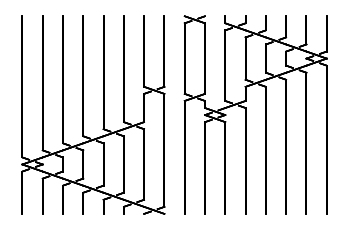

Trenza pura reducida:  [-7, -10, -10, -7]


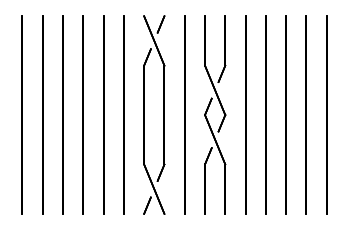

Trenza pura representada con los generadores de Artín:  [(8, 7), (11, 10)]


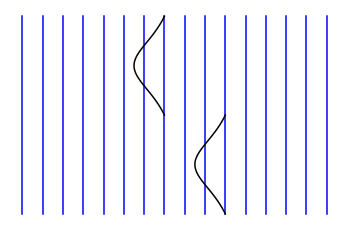

Cruces Ci´s:  [[7, 6, 5, 4, 3, 2, 1], [9], [15, 14, 13, 12, 11]]
Cruces renumerados:  [15, 14, 13, 12, 11, 10, 9, 1, 7, 6, 5, 4, 3]
Cruces bajados:  [15, 15, 15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -2, -3, -4, 5, 5, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, -15, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, -2, -3, -4, -5, -5, 4, 3, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 14, 14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -2, -3, -4, 5, 5, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, -14, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, -2, -3, -4, -5, -5, 4, 3, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 13, 13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -2, -3, -4, 5, 5, 4, 3, 2, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -13, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, -2, -3, -4, -5, -5, 4, 3, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 12, 12, -11, -10, 

In [ ]:
from numpy import *
import matplotlib.pyplot as plt
# En esta sección se mandaran a llamar cada una de las partes del algoritmo
#Cruces = list(input('Introduce el vector de cruces de la trenza: ')) #Ejemplo:= [-1,2,1,-3,2,2,3,2,-1,2]
#NumHilos = int(input('Introduce el número de hilos de la trenza: ')) # Ejemplo:= 4

#---Inicio de paso 1---
#trenza = Trenzas([1,2,-3,-3],4)
trenza = Trenzas([-1,3,2,5,-4,-2,-4],6)
#print(trenza.cruces)
print(trenza)
print(type(trenza))
trenza = trenza.reduce()
print(trenza.cruces)
trenza.Diagrama()
print('Ciclo asociado a la trenza: ',trenza.ciclos())
trenzaConjugada = trenza.Ordenar()
print('Cruces de la trenza conjugada: ', trenzaConjugada.cruces)
trenzaConjugada.Diagrama()
print('Ciclo asociado a la trenza conjugada: ',trenzaConjugada.ciclos())
trenzaConjugada = trenzaConjugada.reduce()
print('Trenza conjugada reducida: ',trenzaConjugada.cruces)
trenzaEstabilizada = trenzaConjugada.Estabilizar()
print('Trenza estabilizada: ',trenzaEstabilizada.cruces)
print('Ciclo de trenza estabilizada: ',trenzaEstabilizada.ciclos())
trenzaEstabilizada.Diagrama()
Ci = trenzaEstabilizada.GenerarCi() #Cruces Ci que se ocuparán para el paso 3
print('Ci´s ',Ci)
trenzaPura = trenzaEstabilizada.GenerarTrenzaPura()
print('Trenza pura asociada: ',trenzaPura.cruces)
trenzaPura.Diagrama()
trenzaPura = trenzaPura.reduce() # Trenza que se ocupará en el paso 2
print('Trenza pura reducida: ',trenzaPura.cruces)
trenzaPura.Diagrama()
#---Fin de paso 1---

#---Inicio de paso 2---
trenzaPura = TrenzasPuras(trenzaPura.cruces,trenzaPura.n) # Se crea un objeto de trenza pura con la trenza genrada en el paso anterior
CrucesArtin = trenzaPura.PeinadoGeneral()
print('Trenza pura representada con los generadores de Artín: ',CrucesArtin)
trenzaPura.GraficaArtin()
#---Fin de paso 2---

#---Inicio de paso 3---
print('Cruces Ci´s: ',Ci)
alphaCi = CruceRenumerar(Ci, trenzaPura.n)
print('Cruces renumerados: ', alphaCi)
crucesBajados = BajarCruces(alphaCi, trenzaPura.n)
print('Cruces bajados: ',crucesBajados)
#---Fin de paso 3---

#---Inicio de paso 4---
nuevosGeneradoresArtin = CambiarGeneradoresArtin(CrucesArtin, trenzaPura.n)
print('Nuevos cruces: ',nuevosGeneradoresArtin)
TrenzaNew = Trenzas(crucesBajados+nuevosGeneradoresArtin,trenzaPura.n)
print(TrenzaNew.n)
print(TrenzaNew.ciclos())
print(len(TrenzaNew.cruces))
TrenzaNew = TrenzaNew.reduce()
print(len(TrenzaNew.cruces))
TrenzaNew = TrenzaNew.reduce3()
print(len(TrenzaNew.cruces))
trenzaConjugada = TrenzaNew.Ordenar()
print('Cruces de la trenza conjugada: ', trenzaConjugada.cruces)
print(trenzaConjugada.ciclos())
trenzaEstabilizada = trenzaConjugada.Estabilizar()
print('Trenza estabilizada: ',trenzaEstabilizada.cruces)
print(len(trenzaEstabilizada.cruces))
trenzaEstabilizada = trenzaEstabilizada.reduce()
trenzaEstabilizada = trenzaEstabilizada.reduce3()
print('Trenza estabilizada: ',trenzaEstabilizada.cruces)
print(len(trenzaEstabilizada.cruces))
print('Ciclo de trenza estabilizada: ',trenzaEstabilizada.ciclos())
#TrenzaNew.Diagrama()
#---Fin de paso 4---

# Parte 2 (*)

In [1]:
"""from numpy import *
class TrenzasPuras2:

  def __init__(self,L,n):
    self.L = L # Trenza pura
    self.n = n # Número de hilos de la trenza pura

  def reduce2(self):
    Lista = self.L.copy()
    continueWhile = True
    while continueWhile == True:
      continueWhile = False
      for i in range(len(Lista)):
        if -Lista[i] in Lista[i:]:
          if len(Lista[i:Lista.index(-Lista[i])]) == 1:
            Lista = delete(Lista,[i,i+1]).tolist()

            continueWhile = True
            break
          elif all([j not in [Lista[i]+1,Lista[i]-1,-Lista[i]+1,-Lista[i]-1] for j in Lista[i+1:int(Lista[i:].index(-Lista[i])+i)]]):
            Lista = delete(Lista,(i,int(Lista[i:].index(-Lista[i])+i))).tolist()
            continueWhile = True
            break
    return TrenzasPuras(Lista,self.n)

  def reduce3(self,CrucesTrenzaPura):
    CrucesTrenzaPuraAux = CrucesTrenzaPura.copy() #Se hace una copia la cual se modificará
    Permutaciones = self.Comb(CrucesTrenzaPuraAux)
    #print(len(Permutaciones))
    continueWhile = True
    while continueWhile == True:
      continueWhile = False
      for i in range(len(Permutaciones)):
        if any([Permutaciones[i][abs(CrucesTrenzaPuraAux[i])] == Permutaciones[j][abs(CrucesTrenzaPuraAux[j])-1] and Permutaciones[i][abs(CrucesTrenzaPuraAux[i])-1] == Permutaciones[j][abs(CrucesTrenzaPuraAux[j])] for j in range(i+1,len(CrucesTrenzaPuraAux))]):
          #Condiciones para deshacer los cruces
          PosicionCruce = [Permutaciones[i][abs(CrucesTrenzaPuraAux[i])] == Permutaciones[j][abs(CrucesTrenzaPuraAux[j])-1] and Permutaciones[i][abs(CrucesTrenzaPuraAux[i])-1] == Permutaciones[j][abs(CrucesTrenzaPuraAux[j])] for j in range(i+1,len(CrucesTrenzaPuraAux))].index(True) + i + 1
          #Primera concidicón que compara si los dos cruces tienen el mismo signo
          #print(i,PosicionCruce)
          if CrucesTrenzaPuraAux[i]/abs(CrucesTrenzaPuraAux[i]) == -CrucesTrenzaPuraAux[PosicionCruce]/abs(CrucesTrenzaPuraAux[PosicionCruce]):
            Hilo1 = Permutaciones[i][abs(CrucesTrenzaPuraAux[i])-1]
            Hilo2 = Permutaciones[i][abs(CrucesTrenzaPuraAux[i])]
            #print(Hilo1,Hilo2)
            #---Reducir---
            #Informacion1 e Informacion2 es un vector de pares el cual indica si el cruce es positico o negativo y con que hilo fue el cruce
            InformacionHilo1 = []
            InformacionHilo2 = []
            #print('si entra a la segunda condición')
            for j in range(i+1,PosicionCruce):
              if Permutaciones[j-1].index(Hilo1) != Permutaciones[j].index(Hilo1):
                InformacionHilo1.append([Permutaciones[j][abs(Permutaciones[j-1].index(Hilo1))],int(CrucesTrenzaPuraAux[j]/abs(CrucesTrenzaPuraAux[j]))])
              if Permutaciones[j-1].index(Hilo2) != Permutaciones[j].index(Hilo2):
                InformacionHilo2.append([Permutaciones[j][abs(Permutaciones[j-1].index(Hilo2))],int(CrucesTrenzaPuraAux[j]/abs(CrucesTrenzaPuraAux[j]))])
            #print(InformacionHilo1)
            #print(InformacionHilo2)
            if InformacionHilo1 == InformacionHilo2:
              continueWhile = True
              CrucesTrenzaPuraAux = delete(CrucesTrenzaPuraAux,(i,PosicionCruce)).tolist().copy()
              Permutaciones = self.Comb(CrucesTrenzaPuraAux.copy())
              break
      #print(CrucesTrenzaPuraAux)
    return CrucesTrenzaPuraAux


  def Comb(self,Cruces): #---Falta reducir---
    V = list(range(1,self.n+1)).copy()
    perm = []
    for i in range(len(Cruces)):
      aux = V[abs(Cruces[i])]
      V[abs(Cruces[i])] = V[abs(Cruces[i])-1]
      V[abs(Cruces[i])-1] = aux
      perm.append(V.copy())
    return perm

  def QuitarNCruces(self,m): #---Falta reducir---
    V1 = self.Comb(self.L.copy()).copy()
    tam = self.n - m + 1
    V1Aux = V1.copy()
    LAux = self.L.copy()
    V1_2 = []
    L_2 = []
    mAux = int (m)
    for j in range(len(LAux)):
      for k in range(self.n):
        if V1Aux[j-1][k] != V1Aux[j][k]:
          n1 = V1Aux[j][k]
          n2 = V1Aux[j][k+1]
          break
      if j == 0:
        if V1Aux[j][mAux-1] != mAux:
          V2_2 = arange(1,self.n+1).tolist()
        else:
          V2_2 = V1Aux[j].copy()
          for k in arange(self.n):
            if n1 == V1Aux[j][k]:
              pos1 = k
            if n2 == V1Aux[j][k]:
              pos2 = k
          if LAux[j] > 0:
            L_2.append(pos2)
          else:
            L_2.append(-pos2)
        V1_2.append(V2_2)
      else:
        for k in range(self.n):
          if n1 == V2_2[k]:
            pos1 = k
          if n2 == V2_2[k]:
            pos2 = k
        if n1 == mAux or n2 == mAux:
          V2_2 = V1_2[j-1].copy()
        else:
          if LAux[j] > 0:
            L_2.append(pos1)
          else:
            L_2.append(-pos1)
          V2_2 = V1_2[j-1].copy()
          cam1 = V2_2[pos1]
          cam2 = V2_2[pos2]
          V2_2[pos1] = cam2
          V2_2[pos2] = cam1
        V1_2.append(V2_2)
    V1_2 = self.Comb(L_2).copy()
    V1Aux = V1_2.copy()
    LAux = L_2.copy()
    return TrenzasPuras(L_2,self.n)

  def PeinarTrenza(self): #---En proceso (INCOMPLETO)
    Beta = TrenzasPuras(self.L,self.n)
    print(Beta.L)
    Gamma = Beta.QuitarNCruces(self.n).reduce2()
    print(Gamma.L)
    GammaInv = TrenzasPuras([-j for j in reversed(Gamma.L)],self.n).reduce2()
    Alfa = TrenzasPuras(Beta.L + GammaInv.L, self.n).reduce2()
    print(Alfa.L)
    Beta = TrenzasPuras(Alfa.L + Gamma.L ,self.n)
    print(Beta.L)
    for i in reversed(range(3,self.n)):
      GammaSig = Gamma.QuitarNCruces(i).reduce2()
      print(GammaSig.L)
      GammaInvSig = TrenzasPuras([-j for j in reversed(GammaSig.L)],self.n).reduce2()
      AlfaSig = TrenzasPuras(Gamma.L + GammaInvSig.L, self.n).reduce2()
      print(AlfaSig.L)
      Gamma = TrenzasPuras(AlfaSig.L + GammaSig.L,self.n)#.reduce2()
      print(Gamma.L)
      Beta = TrenzasPuras(Alfa.L + AlfaSig.L + GammaSig.L, self.n)
      print(Beta.L)
      Gamma = GammaSig
      Alfa = AlfaSig
    return TrenzasPuras(Beta.L,self.n)

class MedioGiro:

  def __init__(self):


#Trenza1 = TrenzasPuras([5, 2, 1, 3, -4, -2, 1, 2, 5, 3, 2, 2, 3, -4, -5, -4, -2, -1, 2, -3, -1, -2],6)
#Trenza2 = TrenzasPuras([5,2,1,3,-4,-2,1,2,5,3,2,2,3,-4,-5,4,1,-2,-3,2],6)
#Trenza2 = TrenzasPuras([-3,-1,4,5,-4,-2,1,-2,-1,-2,5,-4,3,-5],6)
#Trenza2 = TrenzasPuras([-3,-1,-2,-3,1,-4,2,-3,-4,3,-4,-2,-1,-3,2,-3],5)
#print(Trenza1.reduce2().L)
#print(Trenza1.PeinarTrenza().L)
#print(Trenza1.QuitarNCruces(6).reduce2().L)
#print(TrenzasPuras(Trenza2.L+[-j for j in reversed(Trenza2.QuitarNCruces(6).reduce2().L)],6).reduce2().L)
#print(Trenza2.reduce3([-3, -1, -2, -3, 1, -4, 2, -3, -4, 3, -4, 3, -2, -1, 3, 2, 1, 3]))
#print(Trenza2.reduce3([5, 2, 1, 3, -4, -2, 1, 2, 5, 3, 2, 2, 3, -4, -5, -4, -2, -1, 2, -3, -1, -2]))
#print(Trenza2.QuitarNCruces(6).L)
#print(Trenza2.QuitarNCruces(6).QuitarNCruces(5).L) """

"from numpy import *\nclass TrenzasPuras2:\n\n  def __init__(self,L,n):\n    self.L = L # Trenza pura\n    self.n = n # Número de hilos de la trenza pura\n\n  def reduce2(self):\n    Lista = self.L.copy()\n    continueWhile = True\n    while continueWhile == True:\n      continueWhile = False\n      for i in range(len(Lista)):\n        if -Lista[i] in Lista[i:]:\n          if len(Lista[i:Lista.index(-Lista[i])]) == 1:\n            Lista = delete(Lista,[i,i+1]).tolist()\n            \n            continueWhile = True\n            break\n          elif all([j not in [Lista[i]+1,Lista[i]-1,-Lista[i]+1,-Lista[i]-1] for j in Lista[i+1:int(Lista[i:].index(-Lista[i])+i)]]):\n            Lista = delete(Lista,(i,int(Lista[i:].index(-Lista[i])+i))).tolist()\n            continueWhile = True\n            break\n    return TrenzasPuras(Lista,self.n)\n\n  def reduce3(self,CrucesTrenzaPura):\n    CrucesTrenzaPuraAux = CrucesTrenzaPura.copy() #Se hace una copia la cual se modificará\n    Permutacione